In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
DATA_DIR = path.join('..', 'data')

In [2]:
a = np.load('test.npy')

In [3]:
results = pd.DataFrame(a)
results.columns = ['Init_station','Init_time','Init_count','Count_type'] + list(range(5326))
results.replace({'Count_type': {0.0: 'S', 1.0: 'I', 2.0: 'R', 3.0: 'N'}}, inplace=True)
results.set_index(list(results.columns[:4]), inplace=True)
results.head()

0             1     \
Init_station Init_time Init_count Count_type                            
0.0          3.0       1.0        S           7947054.0  7.947054e+06   
                                  I                 1.0  1.006943e+00   
                                  R                 0.0  1.388889e-02   
                                  N           7947055.0  7.947055e+06   
             99.0      1.0        S           7947054.0  7.947054e+06   

                                                      2             3     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.013934e+00  1.020973e+00   
                                  R           2.787421e-02  4.195662e-02   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                      4             5     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.028062e+00  1.035199e+00   
                                  R           5.613680e-02  7.041544e-02   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                      6             7     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.042386e+00  1.049623e+00   
                                  R           8.479320e-02  9.927079e-02   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                      8             9     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.056910e+00  1.064248e+00   
                                  R           1.138489e-01  1.285282e-01   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                  ...               5316  \
Init_station Init_time Init_count Count_type      ...                      
0.0          3.0       1.0        S               ...       3.355473e+06   
                                  I               ...       5.017454e-01   
                                  R               ...       4.591581e+06   
                                  N               ...       7.947055e+06   
             99.0      1.0        S               ...       3.355683e+06   

                                                      5317          5318  \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           3.355473e+06  3.355473e+06   
                                  I           5.017454e-01  5.017454e-01   
                                  R           4.591581e+06  4.591581e+06   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           3.355683e+06  3.355683e+06   

                                                      5319          5320  \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           3.355473e+06  3.355473e+06   
                                  I           5.017454e-01  5.017454e-01   
                                  R  

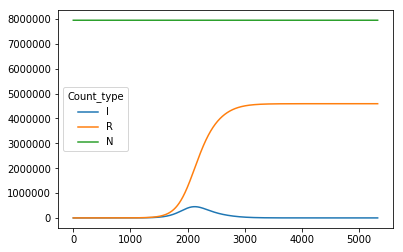

In [4]:
results.xs((0,3,1), level=('Init_station','Init_time','Init_count')).T.drop(columns='S').plot()

In [5]:
filtered=results.xs((1, 'I'), level=('Init_count', 'Count_type')).fillna(0)
filtered_R=results.xs((1, 'R'), level=('Init_count', 'Count_type')).fillna(0)

In [6]:
filtered_R.T.max().head()

Init_station  Init_time
0.0           3.0          4.591581e+06
              99.0         4.591371e+06
              123.0        4.591391e+06
1.0           3.0          4.588649e+06
              99.0         4.588568e+06
dtype: float64

In [7]:
filtered.T.max().head()

Init_station  Init_time
0.0           3.0          451889.241483
              99.0         451451.569448
              123.0        451509.188653
1.0           3.0          447837.229968
              99.0         447733.660271
dtype: float64

In [8]:
peaks = pd.concat([filtered.T.idxmax(), filtered.T.max(), filtered_R.T.max()], axis=1)
peaks.columns = ['Time', 'Value', 'Total']
peaks['Time'] = peaks['Time'] / 24

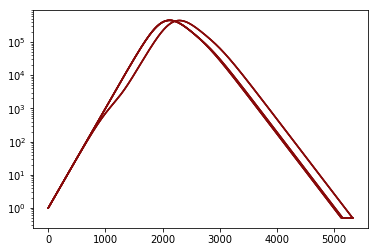

In [9]:
filtered.T.plot(legend=None, color='#870909', logy=True)

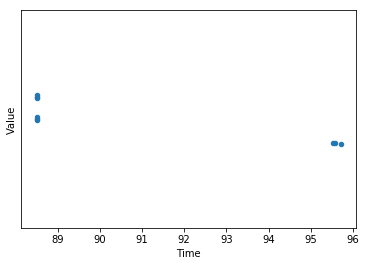

In [10]:
peaks.plot.scatter('Time', 'Value', logy=True)

In [11]:
peaks[peaks['Total'] < 3e6].plot.scatter('Time', 'Total')

ValueError: scatter requires x column to be numeric

In [ ]:
peaks[peaks['Time'] < 40].describe()

In [ ]:
group_1 = peaks[peaks['Time'] < 40]
set(group_1.index.get_level_values('Init_station'))

In [ ]:
peaks[(peaks['Time'] > 40) & (peaks['Time'] < 68)].describe()

In [ ]:
peaks[(peaks['Time'] > 40) & (peaks['Time'] < 68)].sample(1)

In [ ]:
g2_counts=peaks[(peaks['Time'] > 40) & (peaks['Time'] < 68)].reset_index().groupby('Init_station').count()
g2_counts[g2_counts['Total'] != 5]

In [ ]:
peaks[(peaks['Time'] > 68) & (peaks['Time'] < 90)].describe()

In [ ]:
peaks[(peaks['Time'] > 68) & (peaks['Time'] < 90)].reset_index().groupby('Init_station').count()

In [ ]:
peaks[peaks['Time'] > 90]

In [ ]:
results.xs((82,60,1), level=('Init_station','Init_time','Init_count')).drop(columns=range(5000,7000))

In [ ]:
I_series = results.xs('I', level='Count_type').fillna(0)
all_peaks = pd.concat([I_series.T.idxmax(), I_series.T.max(), I_series.T.max()], axis=1)
all_peaks.columns = ['Time', 'Value', 'Total']
all_peaks['Time'] = all_peaks['Time'] / 24
all_peaks.plot.scatter('Time', 'Value', logy=True)

# Minor epidemic group

In [ ]:
group_1 = all_peaks[all_peaks['Value'] < 100]
set(group_1.index.get_level_values('Init_station'))

In [ ]:
move_data = pd.read_csv(path.join(DATA_DIR, 'journey_count.csv'))
move_data.head()

In [ ]:
STATION_LOOKUP = {
    i: name for i, name in enumerate(move_data['Start station'].unique())
}

In [ ]:
station_names=set(STATION_LOOKUP[i] for i in group_1.index.get_level_values('Init_station'))
station_names

## Hypothesis: initial pop related to peak

In [ ]:
from simulate import get_pop_data
pop_data = get_pop_data()[0]
pop_data.set_index('Station', inplace=True)
pop_data.head()

In [ ]:
pop_data.loc['Aldgate']['Station population']

In [ ]:
all_peaks['Station_name'] = [STATION_LOOKUP[s] for s in all_peaks.reset_index()['Init_station']]
all_peaks['Station_pop'] = all_peaks['Station_name'].apply(lambda s: pop_data.loc[s]['Station population'])
all_peaks.head()

In [ ]:
all_peaks[all_peaks['Value'] < 3e5].plot.scatter('Station_pop', 'Value')